<a href="https://colab.research.google.com/github/thomaskopalidis/Projects/blob/main/AIDL_01_classification_Kopalidis_thomas_0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETES

Research Topic

Diabetes is a chronic disease impacting millions worldwide. Early identification of risk factors can improve prevention and treatment.


Object

To explore the relationship between 8 variables (age, gender, BMI, hypertension, heart disease, smoking history, HbA1c levels, blood glucose levels)  and diabetes status (positive/negative)  


Research Questions
- From the aforementioned variables (or factors) are related strongly with the disease of diabetes ?

- How specific variables such as BMI, age, HbA1c, smoking history, blood glucose levels differ between diabetic and non - diabetic groups ?

- Are males or females more vulnerable?

- What BMI range has the highest prevalence of diabetes?

- Are hypertensive patients more prone to diabetes than non-hypertensive patients?

- What is the relationship between smoking history and diabetes prevalence?

What is done in this project ?

1. My project aims to predict diabetes occurrence using patient health indicators  include BMI, age, hypertension, heart disease, smoking history, HbA1c, blood glucose, etc.
I chooce ML models instead of conventional because with ML models can capture non-linear interactions, combining multiple risk factors simultaneously, and complex boundaries that simple rules or linear statistics often miss, and they scale better for automated risk screening.*  

# Step 1.Import Dataset,  libraries and Read Dataset

In [ ]:
#Import Libraries
#Manage warning messages in Python
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np  # numpy is for numerical operations
import pandas as pd # pandas for data manipulation and analysis


# Import Visualization libraries

import matplotlib.pyplot as plt # matplotlib is for creating plots
import seaborn as sns # seaborn is for statistical visualizations

# Set the decimal format (display only the 2 decimal)
pd.options.display.float_format = "{:.2f}".format

Ways to import a dataset in the coolab

1st upload the dataset file directly in the coolab enviroment and read it

2nd You have to put the dataset diabetes_prediction_dataset.csv in this path MyDrive/Master_AI_DL/data/

3rd
1. Create a Kaggle account or link it with an existing one (e.g., Gmail).
2. Go to your Kaggle account settings, scroll to the API section, and click Expire API Token to remove any previous tokens.
3. Click Create New API Token — this will download a kaggle.json file to your machine.

4th Copy past kagglehub in the download section

In [ ]:
import kagglehub

import os # os module is to handle file paths

path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'diabetes_prediction_dataset.csv')
# load cvs file into pandas dataframe for analysis
df = pd.read_csv(file_path)



Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


# Step 2. Data Summary

In this section, I briefly present the dataset, the key statistics, any missing values, as well as visualizations by target category. The aim is to understand the distribution of the features and potential relationships with the outcome (Diabetic / Non-Diabetic).

Understand the data structure

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [ ]:
df.info()  #check the columns types, dtype, non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe() # for numeric variables

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
df.shape
#100.000 rows and 9 variables

(100000, 9)

#Step 3. EDA (Exploratory Data Analysis)

In [ ]:
# Count numeric columns
num_cols = df.select_dtypes(include=['number']).columns
num_count = len(num_cols)

# Count categorical columns (including text)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_count = len(cat_cols)


print(f"Number of categorical columns: {cat_count}")
print(f"Which are the categorical columns: {cat_cols}")
print("-------------------------------")
print(f"Number of numerical columns: {num_count}")
print(f"Which are the numerical columns: {num_cols}")

Number of categorical columns: 2
Which are the categorical columns: Index(['gender', 'smoking_history'], dtype='object')
-------------------------------
Number of numerical columns: 7
Which are the numerical columns: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


##Handling Duplicates


In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data)
print("Number of duplicate rows:", df.duplicated().sum())

number of duplicate rows:         gender   age  hypertension  heart_disease smoking_history   bmi  \
2756     Male 80.00             0              0         No Info 27.32   
3272   Female 80.00             0              0         No Info 27.32   
3418   Female 19.00             0              0         No Info 27.32   
3939   Female 78.00             1              0          former 27.32   
3960     Male 47.00             0              0         No Info 27.32   
...       ...   ...           ...            ...             ...   ...   
99980  Female 52.00             0              0           never 27.32   
99985    Male 25.00             0              0         No Info 27.32   
99989  Female 26.00             0              0         No Info 27.32   
99990    Male 39.00             0              0         No Info 27.32   
99995  Female 80.00             0              0         No Info 27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756          6.60              

In [ ]:
#remove duplicates
df = df.drop_duplicates()

Check the number of distinct values

In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values}")
    print(df[column].unique())

gender: 3
['Female' 'Male' 'Other']
age: 102
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension: 2
[0 1]
heart_disease: 2
[1 0]
smoking_history: 6
['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi: 4247
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level: 18
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level: 18
[140  80 158 155  85 200 145 100 130 160 126 159  90 

##Check for missing values,  outliers, strange values

In [ ]:
#missisng value
df.isnull().sum()
#there is no missing value in the dataset

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Remove ‘Other’ category from Gender





In [ ]:
df = df[df['gender'] != 'Other']

#Step 4. Feature Understanding

##Univariate Analysis
The univariate analysis explores each variable individually to understand its distribution and detect outliers.

###Plot Histogram
To see the distribution of each numeric feature

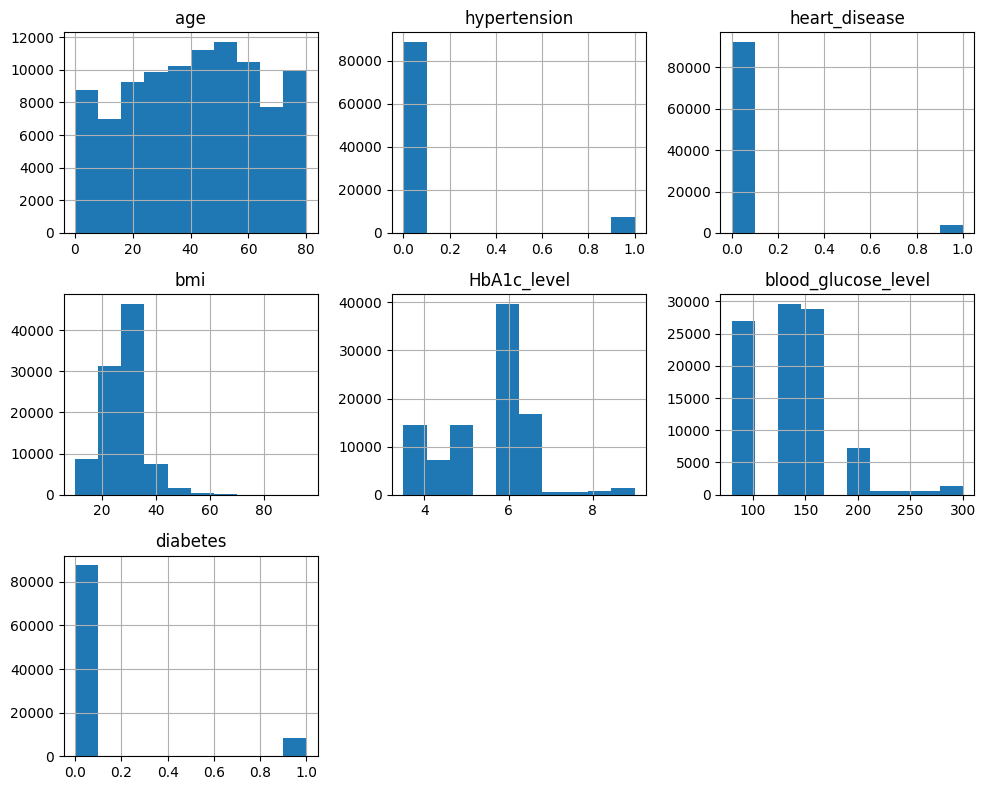

In [ ]:
df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

1. Based the histogram, the variable ***age*** (scale) range from 0 to 80.
We can see a slightly drop at age 10 - 20 and 60 to 70.

2. For the variable ***hypertension*** (nominal) (0 or 1)
Most values are 0 (no hypertension) and less 1 (have hypertension)
This show that hypertension is rare in the dataset.

3. For the variable ***heart disease*** (nominal: 0 --> no, 1 ---> yes)
Very few people in the dataset have heart disease.

4. ***BMI*** variable is skewed to the right ( positively skewed) and as we see most patients have BMI around 20-30 and some outliers>40. (In the next step we will see the outliers)

5. The variable ***HbA1c_level*** mostly are between 5 and 7, with the peak at 6, it seems that this distribution might be normal distribution.

6. The variable blood glucose level concentrated around 100 and 200. We can see some very high values > 250 and that might be outliers or extreme diabetes  cases.

7. Last but not least, is the ***diabetes*** ( target variable), this variable are imbalced because the majority of the people have non diabetes (0) and minority have.


##Categorical
We can see them with bar chart, pie chart

###Pie chart and Bar chart

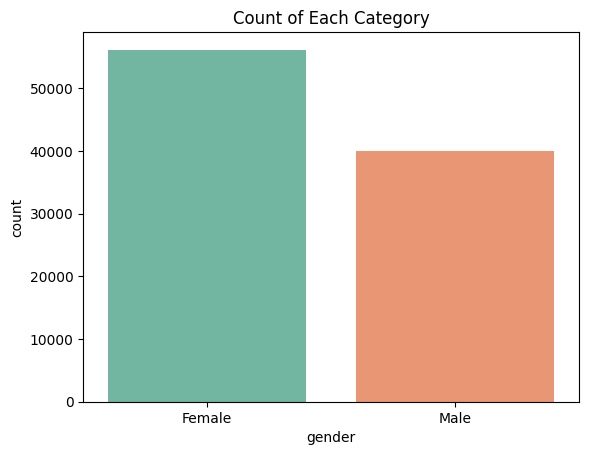

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Count of Each Category")
plt.show()


We can see that in our dataset we have more women than men 60% vs 40%.
This is important because it can affect the balance in prediction if there is gender-related bias.

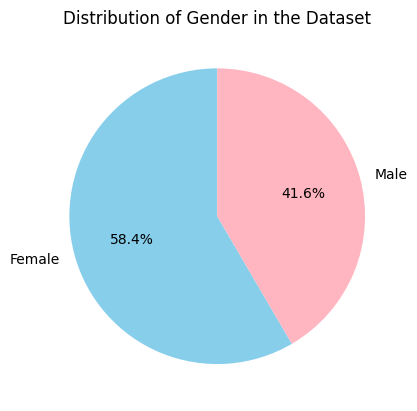

In [ ]:
df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink'],  # Match order of gender categories
    startangle=90
)
plt.title("Distribution of Gender in the Dataset")
plt.ylabel("")
plt.show()

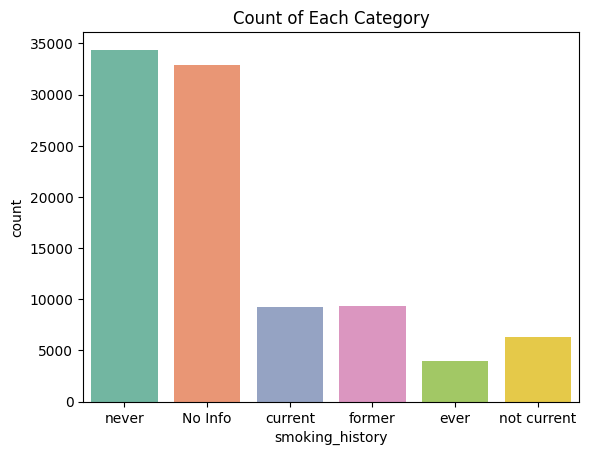

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='smoking_history', data=df, palette='Set2')
plt.title("Count of Each Category")
plt.show()
plt.savefig("Count of Each Category smoking_history", dpi=300, bbox_inches='tight')

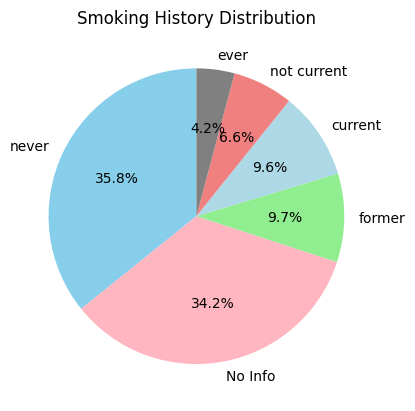

<Figure size 640x480 with 0 Axes>

In [ ]:
df['smoking_history'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink', 'lightgreen', 'lightblue', 'lightcoral', 'grey'],  # Valid colors
    startangle=90
)
plt.title("Smoking History Distribution")
plt.ylabel("")  # Optional: hides axis label
plt.show()
plt.savefig("smoking_histort_distribution.png", dpi=300, bbox_inches='tight')

##Outliers
Checking for outliers in numeric columns is an important part of data analysis. Outliers can:

    Skew your mean and standard deviation

    Affect correlations

    Impact visualizations

    Mislead your interpretation if not handled properly

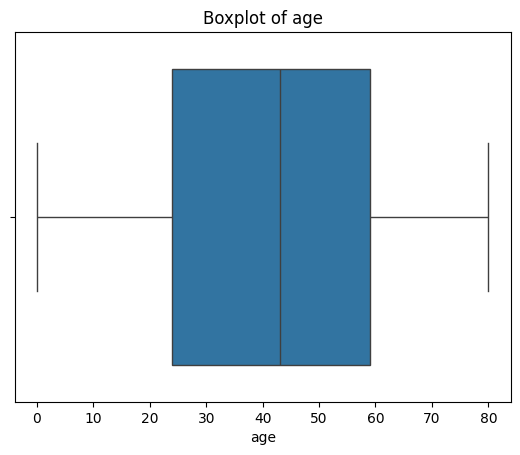

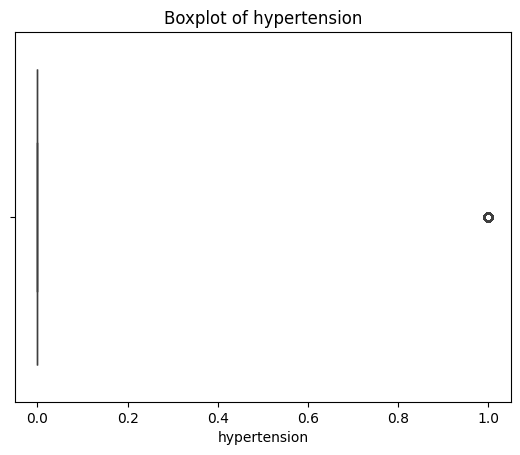

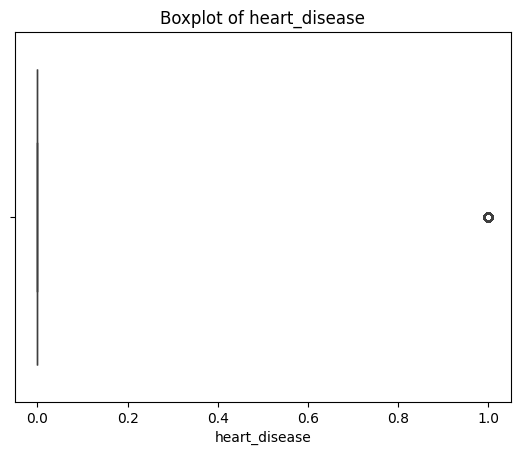

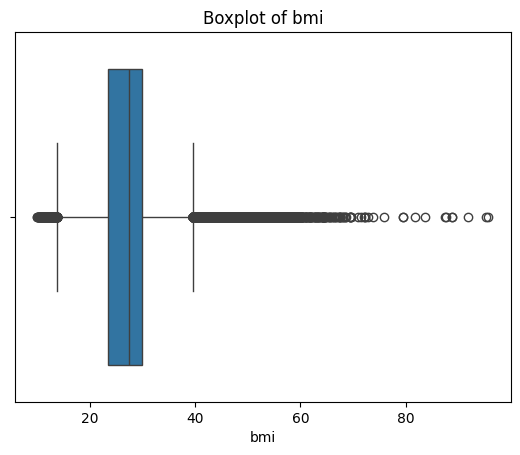

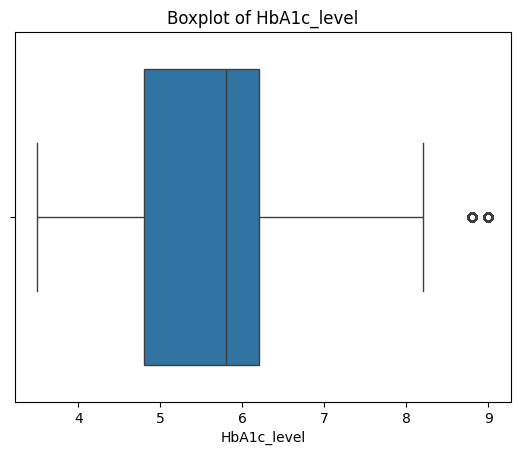

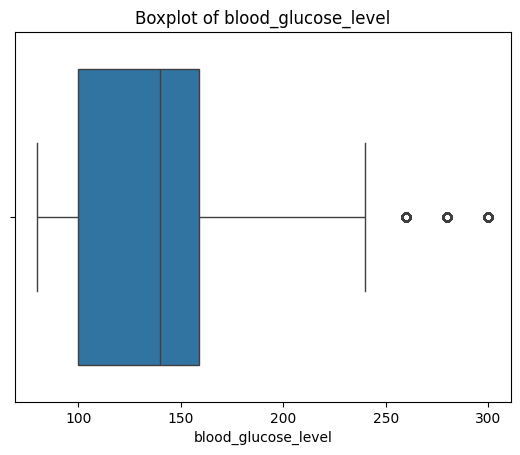

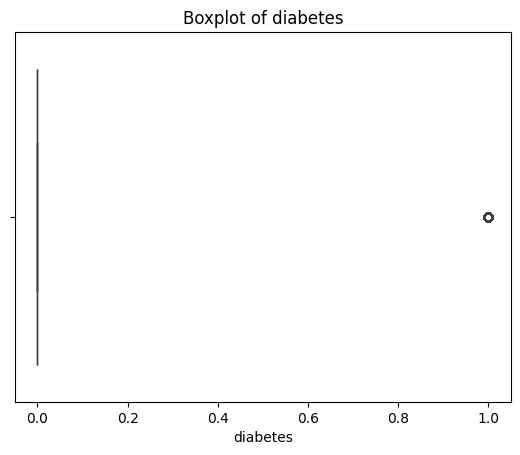

In [ ]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

##Bivariate Analysis
The bivariate analysis examines how two variables relate to each other — for example, how age or BMI varies between people with and without diabetes — helping us identify patterns and potential risk factors.

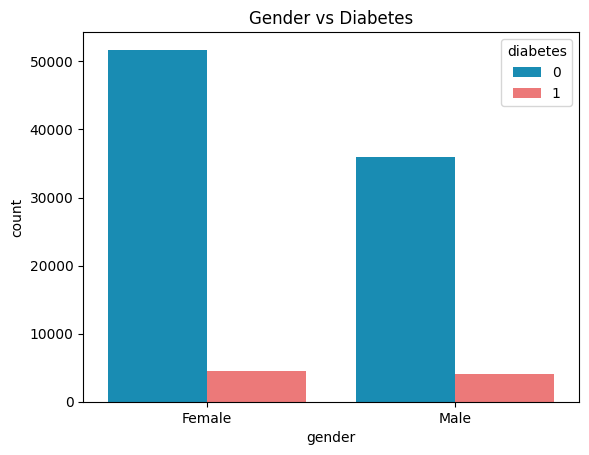

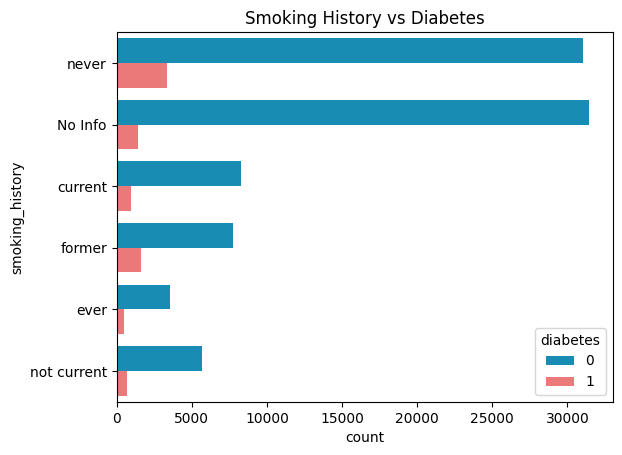

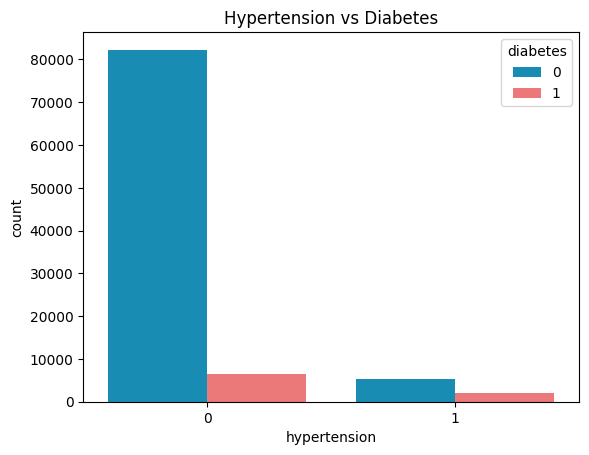

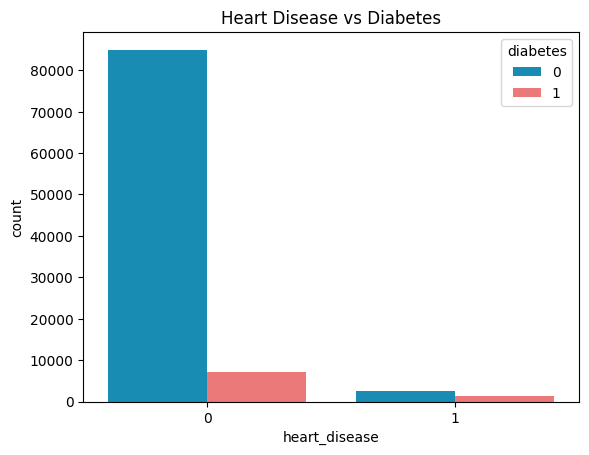

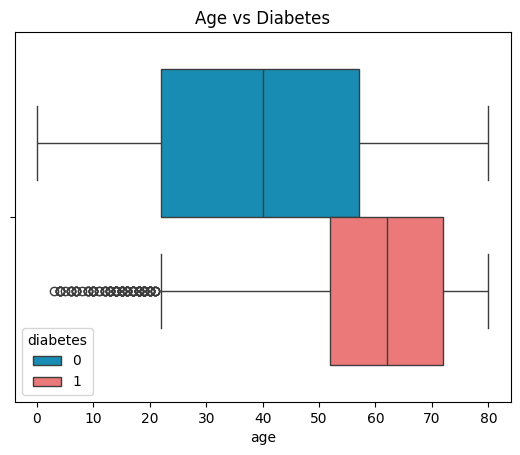

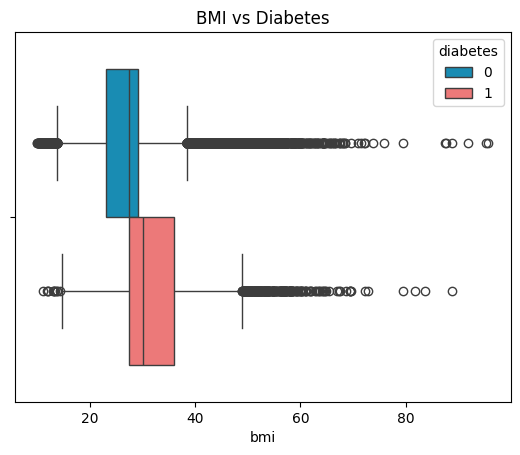

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = ["#0099cc", "#ff6666"]
# Gender vs Diabetes
sns.countplot(x='gender', hue='diabetes', data=df, palette=custom_palette)
plt.title('Gender vs Diabetes')
plt.show()

# Smoking History vs Diabetes
sns.countplot(y='smoking_history', hue='diabetes', data=df,palette=custom_palette)
plt.title('Smoking History vs Diabetes')
plt.show()

# Hypertension vs Diabetes
sns.countplot(x='hypertension', hue='diabetes', data=df , palette=custom_palette)
plt.title('Hypertension vs Diabetes')
plt.show()

# Heart Disease vs Diabetes
sns.countplot(x='heart_disease', hue='diabetes', data=df,palette=custom_palette)
plt.title('Heart Disease vs Diabetes')
plt.show()

# Age vs Diabetes
sns.boxplot(x='age',  hue='diabetes', data=df, palette=custom_palette)
plt.title('Age vs Diabetes')
plt.show()

# BMI vs Diabetes
sns.boxplot(x='bmi',  hue='diabetes', data=df, palette=custom_palette)
plt.title('BMI vs Diabetes')
plt.show()

In [ ]:
# Categorize BMI into groups and calculate the average diabetes rate for each group.
# This helps us see how diabetes prevalence changes across BMI categories.
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 100],
                         labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+'])

bmi_stats = df.groupby('bmi_group')['diabetes'].mean()
print(bmi_stats)

bmi_group
Underweight   0.01
Normal        0.04
Overweight    0.08
Obese I       0.15
Obese II+     0.22
Name: diabetes, dtype: float64


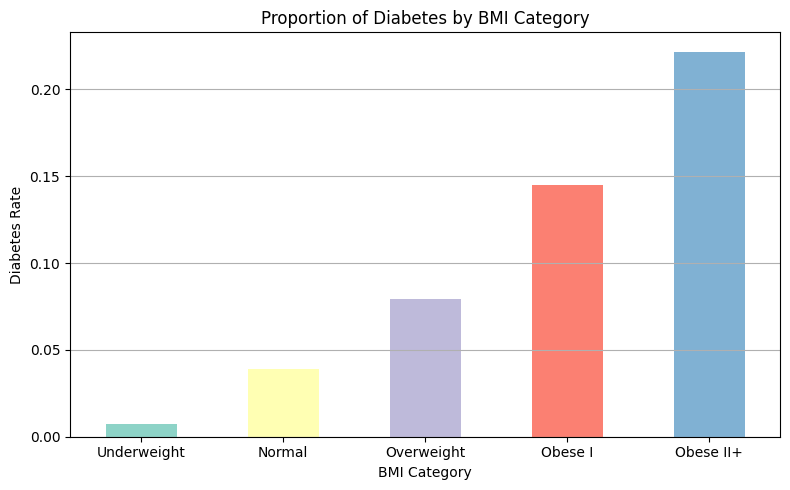

In [ ]:
colors = plt.get_cmap("Set3").colors

bmi_stats.plot(kind='bar', figsize=(8, 5), color=colors)
plt.title('Proportion of Diabetes by BMI Category')
plt.ylabel('Diabetes Rate')
plt.xlabel('BMI Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

Histogram and boxplot for numerical variables

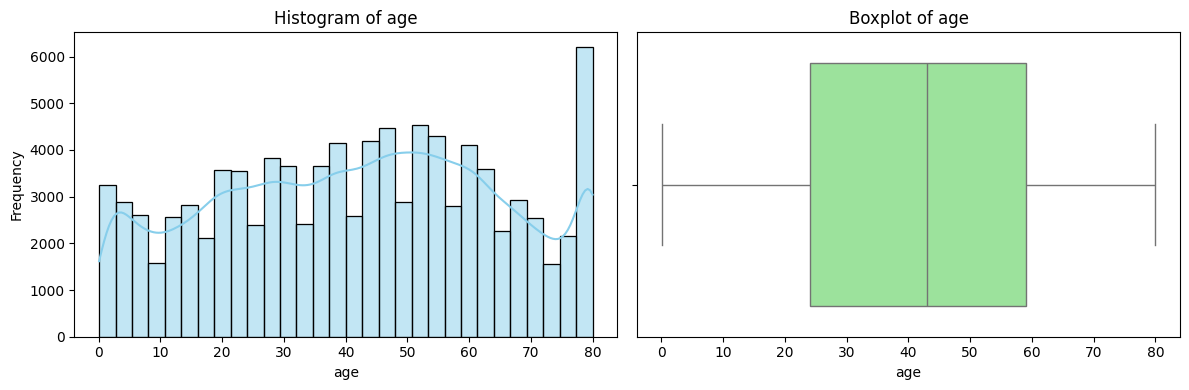

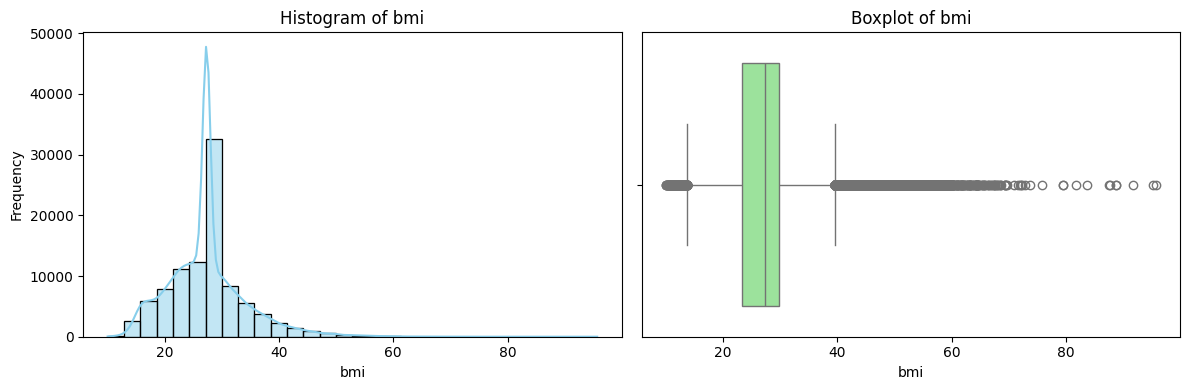

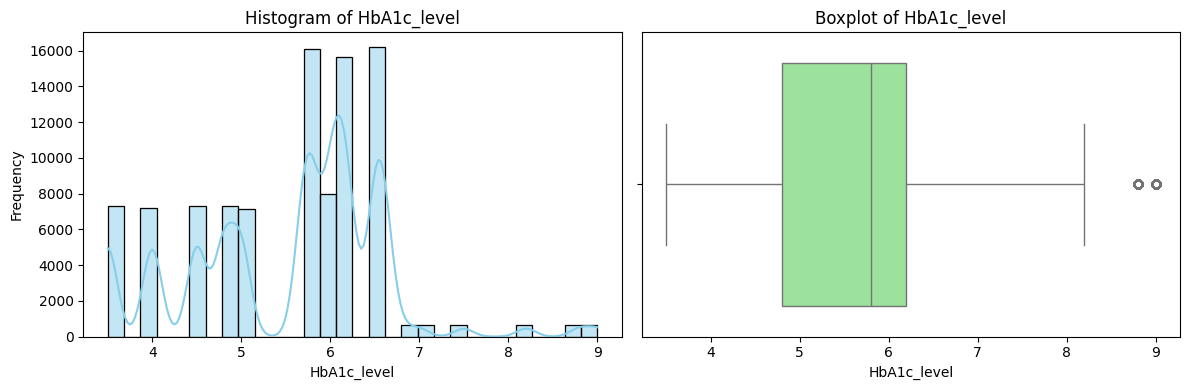

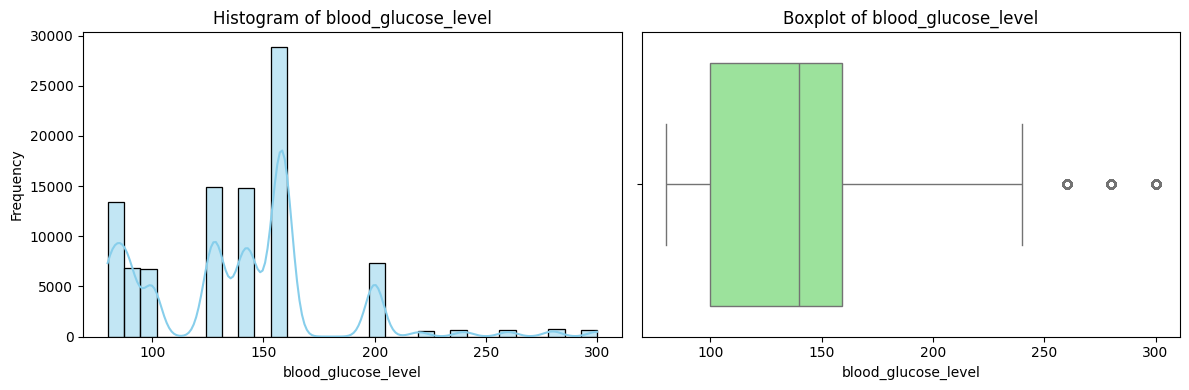

In [ ]:

numeric_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for var in numeric_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(df[var], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {var}')
    axes[1].set_xlabel(var)

    plt.tight_layout()
    plt.show()

In [ ]:
#Drop the bmi_group which is not necessary for correlation matrix
df = df.drop(columns=['bmi_group'])

#Step 5. Correlation matrix I (Multivariate Analysis)
Only for numeric variable

In [ ]:
correlation_matrix = df.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

                     age  hypertension  heart_disease  bmi  HbA1c_level  \
age                 1.00          0.26           0.24 0.34         0.11   
hypertension        0.26          1.00           0.12 0.15         0.08   
heart_disease       0.24          0.12           1.00 0.06         0.07   
bmi                 0.34          0.15           0.06 1.00         0.08   
HbA1c_level         0.11          0.08           0.07 0.08         1.00   
blood_glucose_level 0.11          0.08           0.07 0.09         0.17   
diabetes            0.26          0.20           0.17 0.21         0.41   

                     blood_glucose_level  diabetes  
age                                 0.11      0.26  
hypertension                        0.08      0.20  
heart_disease                       0.07      0.17  
bmi                                 0.09      0.21  
HbA1c_level                         0.17      0.41  
blood_glucose_level                 1.00      0.42  
diabetes                    

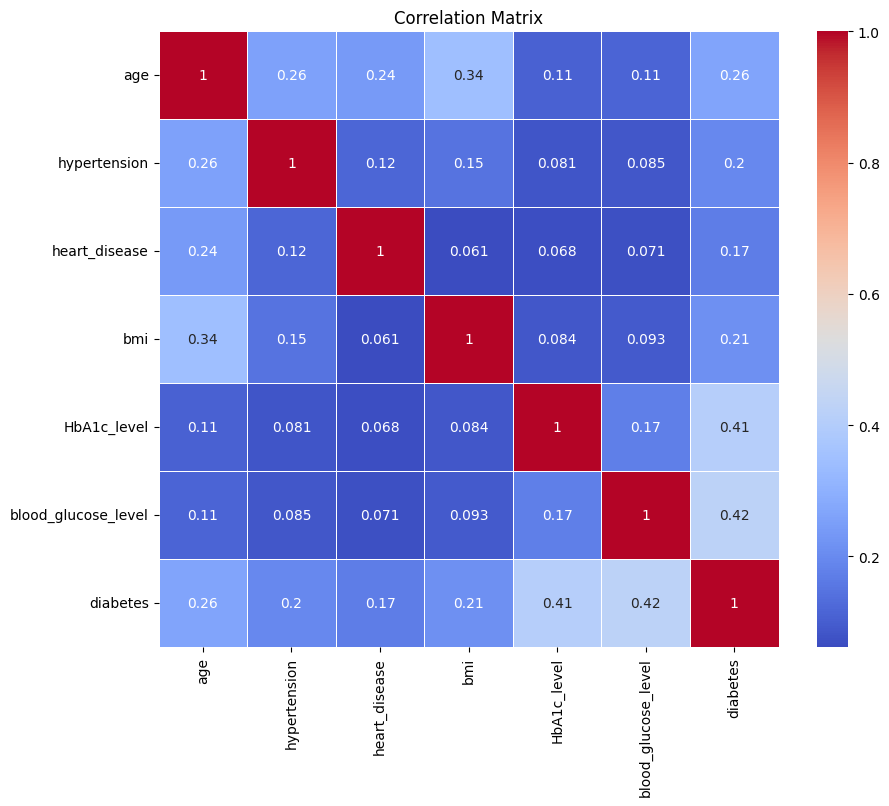

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [ ]:
data = df.copy()

Next, i want to see the correlation matrix for all the dataset.

#Step 6. Correlation matrix II


##ENCODING


So, namely we use one-hot encoding to convert categorical variables like gender and smoking_history into numeric format.
This creates separate binary columns for each category.  One hot encoding is the process to transform the categorical into numerical variable so to compare them all together in the correlation matrix.

It ensures that no false order or ranking is introduced while keeping the meaning of each category clear.

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

                              age  hypertension  heart_disease   bmi  \
age                          1.00          0.26           0.24  0.34   
hypertension                 0.26          1.00           0.12  0.15   
heart_disease                0.24          0.12           1.00  0.06   
bmi                          0.34          0.15           0.06  1.00   
HbA1c_level                  0.11          0.08           0.07  0.08   
blood_glucose_level          0.11          0.08           0.07  0.09   
diabetes                     0.26          0.20           0.17  0.21   
gender_Female                0.03         -0.01          -0.08  0.02   
gender_Male                 -0.03          0.01           0.08 -0.02   
smoking_history_current      0.03          0.02           0.01  0.05   
smoking_history_non-smoker  -0.23         -0.07          -0.09 -0.15   
smoking_history_past_smoker  0.24          0.07           0.09  0.13   

                             HbA1c_level  blood_glucose_level  

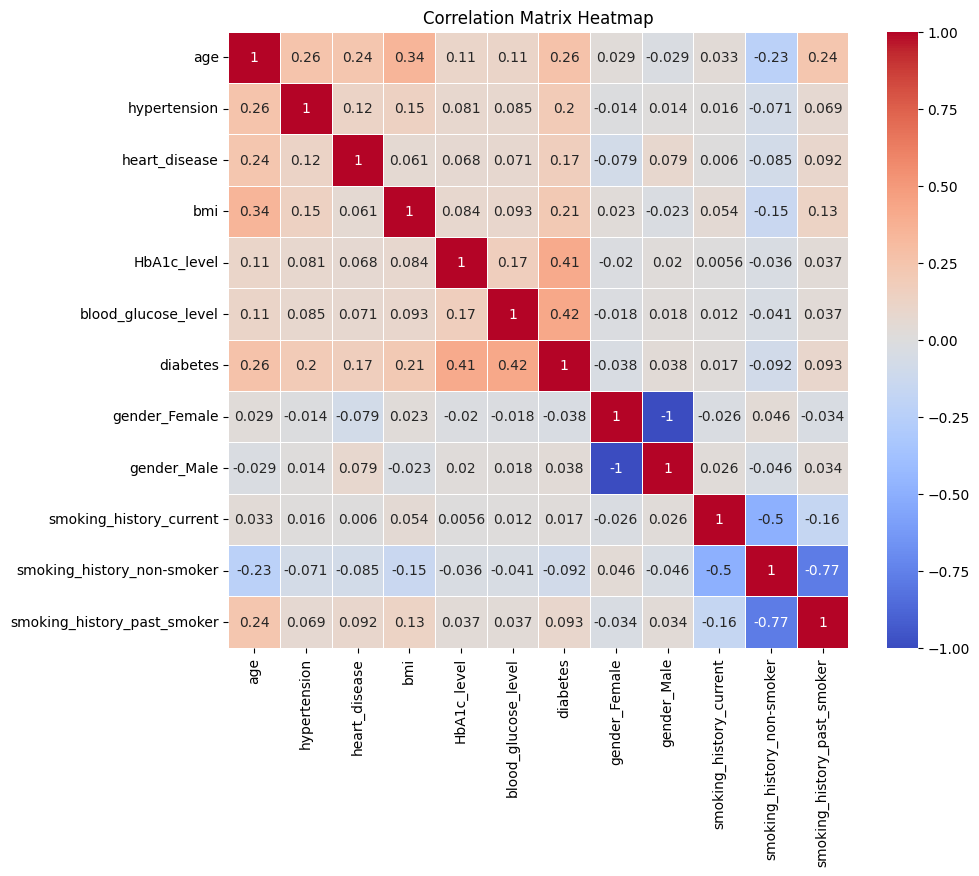

In [ ]:
correlation_matrix = data.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

#Graph 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Create a Heatmap of correlations and sort them in descending order

We calculate the correlation between each numeric variable and the target variable, diabetes.
The heatmap shows which features have the strongest positive or negative relationships with diabetes.
This helps us quickly see which factors might be important for predicting diabetes.

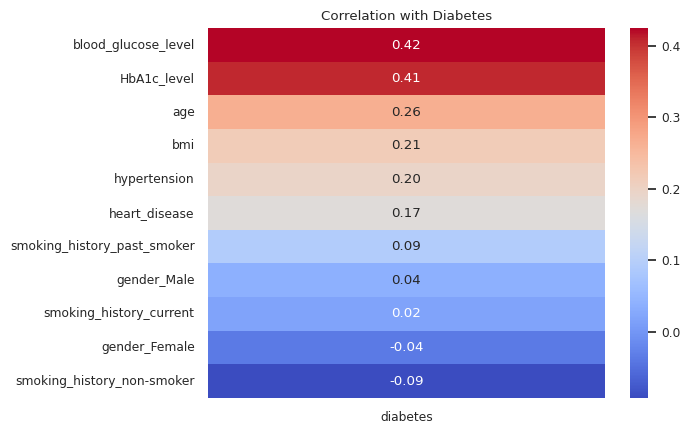

In [ ]:
# Graph 2
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Based the data analysis that i have done we can answer the following questions:


1. From the aforementioned variables (or factors) are related strongly with the disease of diabetes and what is the less related srongly  ?

Based on the correlation matrix, blood glucose level is the variable most strongly related to diabetes, followed closely by HbA1c level.
The variable least related to diabetes is smoking history (non-smoker), which actually has a small negative correlation, suggesting that people who have never smoked are slightly less likely to have diabetes

2. How specific variables such as age, HbA1c, blood glucose levels differ between diabetic and non - diabetic groups ?

Based on the the boxplot for age it shows that diabetic patients tend to be older on average compared to non-diabetic patients.

For HbA1c & Blood Glucose we know these variables have strong positive relationships with diabetes — so diabetics have higher HbA1c and blood glucose levels.

3. Are males or females more vulnerable?

that males in this dataset are slightly more likely to have diabetes than females, but the effect is very weak — so gender alone is not a strong predictor.

4. What BMI range has the highest prevalence of diabetes?

I create a variable bmi_range, so based this range and the bibliography the most affected variable is obese type II with range ( > 40), namley the obese type II have the highest prevalence of diabetes, which matches established medical literature.

5. Are hypertensive patients more prone to diabetes than non-hypertensive patients?

Based the heatmap among non-hypertensive people, only 7,2% have diabetes while the hypertensive people 28% have diabetes. That mean approximately the hypertensive patients have 4x more likely to have diabetes compare to non-hypertensive ones.

6. What is the relationship between smoking history and diabetes prevalence?

Smoking history shows a weak relationship with diabetes.
Past smokers are slightly more likely to be diabetic, while non-smokers are slightly less likely. Of course, this variable is not a strong predictor of diabetes in this dataset.



***To sum up,*** the exploratory data analysis reveals that blood glucose level and HbA1c level are the strongest predictors of diabetes in this dataset, with moderate positive correlations.

Age, BMI, and hypertension also show meaningful positive relationships with diabetes, highlighting their importance as risk factors.

Gender shows only a weak effect, with males slightly more likely to have diabetes than females.

Smoking history has a minimal impact overall, with past smokers slightly more prone to diabetes but non-smokers showing a slight negative relationship.

Additionally, people with higher BMI categories — especially those classified as Obese Type II+ — have the highest diabetes prevalence.

Finally, hypertensive patients are about four times more likely to have diabetes than non-hypertensive individuals, confirming hypertension as a relevant comorbidity.

#Step 7. AIDL01

#AI01 CLASSIFICATION PROBLEM

I applied three classification models: Logistic Regression, Random Forest. For each model, I used pipelines with appropriate standardization where needed, Stratified K-Fold cross-validation, and hyperparameter tuning (GridSearchCV). I evaluate the models using Accuracy, Precision, Recall, F1, and ROC-AUC.

MODEL SELECTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV, cross_validate, learning_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time
start = time.perf_counter()

target_col = 'diabetes'   # <-- άλλαξε αν η στήλη έχει διαφορετικό όνομα
X = data.drop(columns=[target_col])
y = data[target_col].astype(int)

# Έλεγχος ισορροπίας κλάσεων
print("Class balance (proportions):")
print(y.value_counts(normalize=True).rename({0:'class 0', 1:'class 1'}))

# Train / Test split (80/20 με stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

Class balance (proportions):
diabetes
class 0   0.91
class 1   0.09
Name: proportion, dtype: float64


Cross-Validation + GridSearch

In [ ]:
start = time.perf_counter()
# Pipelines
pipe_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipe_rf = Pipeline(steps=[
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Param grids
param_lr = {
    'clf__C': [ 0.1, 1, 10],
    'clf__penalty': ['l2']
}

param_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
    'clf__min_samples_split': [2],
    'clf__min_samples_leaf': [1]
}

models = [
    ('Logistic Regression', pipe_lr, param_lr),
    ('Random Forest', pipe_rf, param_rf)
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'average_precision': 'average_precision'  # PR-AUC
}

cv_summary_rows = []
best_estimators = []

PRIMARY = 'average_precision'

for name, pipe, grid in models:
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring=scorers,     # <-- πολλαπλά metrics μέσα στο ίδιο CV
        refit= PRIMARY,     # <-- επιλέγει & ξανα-εκπαιδεύει με βάση ROC-AUC
        cv=cv,
        n_jobs=-1,
        verbose=0
    )
    gs.fit(X_train, y_train)

    # Πάρε τα mean scores από το ίδιο CV (χωρίς δεύτερο cross_validate)
    res = gs.cv_results_
    best_idx = gs.best_index_

    row = {
    'model': name,
    'best_params': gs.best_params_,
    'cv_accuracy_mean':  res['mean_test_accuracy'][best_idx],
    'cv_precision_mean': res['mean_test_precision'][best_idx],
    'cv_recall_mean':    res['mean_test_recall'][best_idx],
    'cv_f1_mean':        res['mean_test_f1'][best_idx],
    'cv_roc_auc_mean':   res['mean_test_roc_auc'][best_idx],
    'cv_avg_precision_mean': res['mean_test_average_precision'][best_idx]
    }
    cv_summary_rows.append(row)
    best_estimators.append((name, gs.best_estimator_, gs.best_score_))

cv_summary = pd.DataFrame(cv_summary_rows).sort_values(
    by='cv_avg_precision_mean', ascending=False  # <-- sort by PRIMARY
)
display(cv_summary)

best_name, best_model, _ = max(best_estimators, key=lambda t: t[2])
print(f"\nBest model based on CV PRIMARY: {best_name}")
time.sleep(2)
end = time.perf_counter()

print("Duration:", end - start, "sec")

,model,best_params,cv_accuracy_mean,cv_precision_mean,cv_recall_mean,cv_f1_mean,cv_roc_auc_mean,cv_avg_precision_mean
1,Random Forest,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.91,0.48,0.90,0.63,0.98,0.88
0,Logistic Regression,"{'clf__C': 10, 'clf__penalty': 'l2'}",0.89,0.43,0.88,0.58,0.96,0.82



Best model based on CV PRIMARY: Random Forest
Duration: 83.74964741600002 sec


Evaluation test set


=== Logistic Regression — Test Metrics ===
Accuracy:  0.885
Precision: 0.425
Recall:    0.870
F1-score:  0.571
ROC-AUC:   0.959
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17530
           1       0.42      0.87      0.57      1696

    accuracy                           0.88     19226
   macro avg       0.71      0.88      0.75     19226
weighted avg       0.94      0.88      0.90     19226



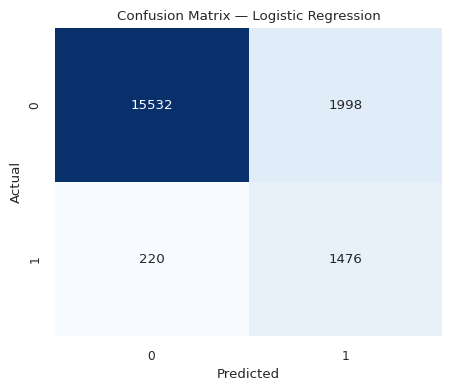

<Figure size 640x480 with 0 Axes>

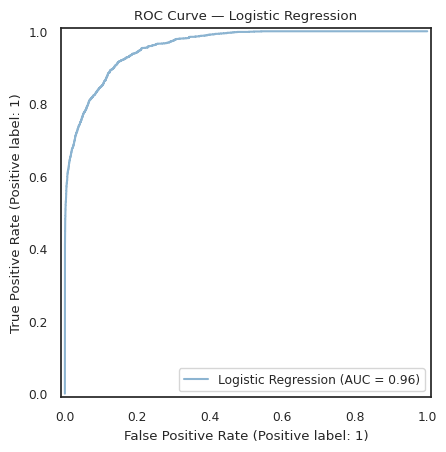


=== Random Forest — Test Metrics ===
Accuracy:  0.897
Precision: 0.458
Recall:    0.895
F1-score:  0.606
ROC-AUC:   0.974
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     17530
           1       0.46      0.90      0.61      1696

    accuracy                           0.90     19226
   macro avg       0.72      0.90      0.77     19226
weighted avg       0.94      0.90      0.91     19226



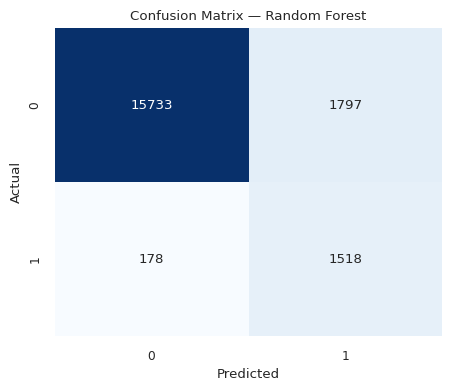

<Figure size 640x480 with 0 Axes>

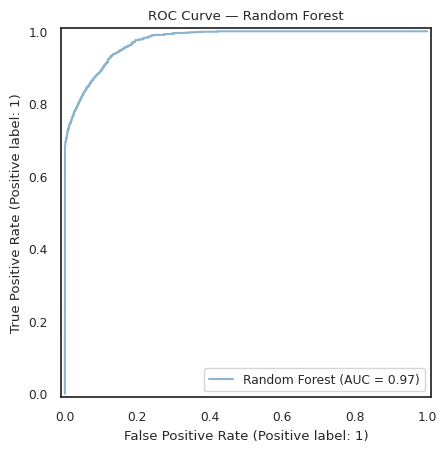

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)

def _y_score(est, X):
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X)[:, 1]
    elif hasattr(est, "decision_function"):
        return est.decision_function(X)
    return est.predict(X)  # fallback

# === Evaluate ALL tuned models on TEST set + Confusion Matrix + ROC ===
roc_cache = []

for name, est, _ in best_estimators:
    est.fit(X_train, y_train)

    y_pred  = est.predict(X_test)
    y_score = _y_score(est, X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    roc  = roc_auc_score(y_test, y_score)

    print(f"\n=== {name} — Test Metrics ===")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-score:  {f1:.3f}")
    print(f"ROC-AUC:   {roc:.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix (per model)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.title(f'Confusion Matrix — {name}')
    plt.show()

    # ROC curve (per model)
    plt.figure()
    RocCurveDisplay.from_predictions(y_test, y_score, name=name)
    plt.title(f'ROC Curve — {name}')
    plt.show()

    roc_cache.append((name, y_score))

**Logistic Regression.** The model achieves ROC-AUC 0.959 and Recall 0.87 for the positive class, so it detects the vast majority of true positives; however, the Precision 0.425 indicates a fair number of false positives. The confusion matrix (TN=15,532, FP=1,998, FN=220, TP=1,476) confirms a “sensitive” operating point: few FN but many FP. The ROC curve is strong, showing good separability, and the chosen threshold is what mainly drives the lower precision. Overall, it’s suitable for screening (not missing cases), with threshold tuning/calibration recommended if higher specificity is needed.




**Random Forest**. Overall performance is stronger: ROC-AUC 0.974, Recall 0.895, Precision 0.458, F1 0.606, Accuracy 0.897. The confusion matrix (TN=15,733, FP=1,797, FN=178, TP=1,518) shows fewer FN and fewer FP than Logistic Regression, so it improves both sensitivity and specificity. The ROC curve is slightly superior, indicating better discrimination. In summary, both models generalize well, but Random Forest is the preferred baseline; if you need fewer FP, apply threshold tuning to raise precision with only a small drop in recall.

Learning Curve (Over/Underfitting Diagnosis)

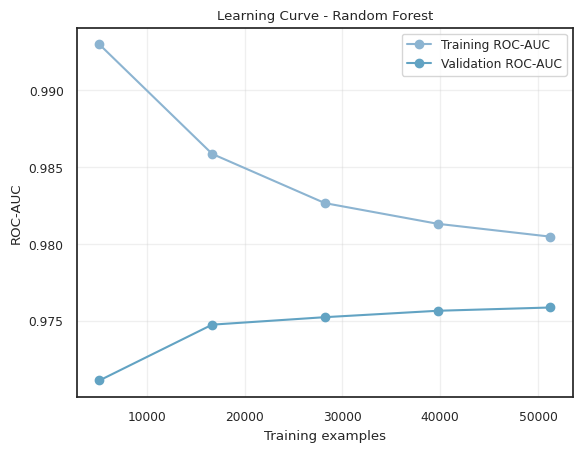

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker='o', label='Training ROC-AUC')
plt.plot(train_sizes, val_mean, marker='o', label='Validation ROC-AUC')
plt.xlabel('Training examples')
plt.ylabel('ROC-AUC')
plt.title(f'Learning Curve - {best_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Learning Curves & Diagnosis.

The Random Forest learning curve shows a healthy convergence pattern: as the training samples increase, the training ROC-AUC decreases slightly (from a very high level) while the validation ROC-AUC rises slightly and stabilizes; the gap between them narrows and remains small. This suggests that the initial tendency for slight overfitting decreases with more data, and the model generalizes well (high values for both curves).

Top-10 Most Influential Features (Classification)

HbA1c_level                   0.43
blood_glucose_level           0.28
age                           0.16
bmi                           0.07
hypertension                  0.03
heart_disease                 0.02
smoking_history_past_smoker   0.00
smoking_history_non-smoker    0.00
gender_Female                 0.00
gender_Male                   0.00
smoking_history_current       0.00
dtype: float64


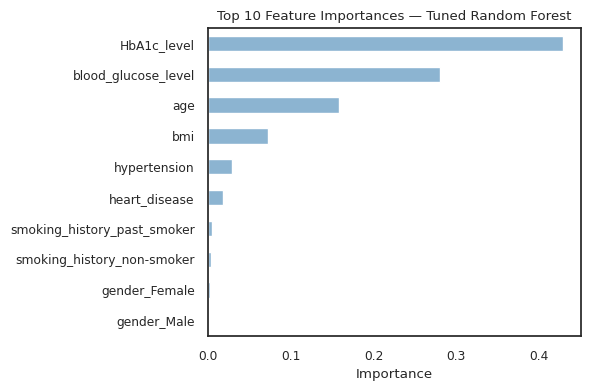

In [ ]:
rf_est = None
for name, est, *_ in best_estimators:
    if "Random Forest" in name:
        rf_est = est
        break

if rf_est is None:
    print("No Random Forest found in best_estimators.")
else:

    rf_clf = rf_est.named_steps['clf'] if hasattr(rf_est, "named_steps") else rf_est

    if hasattr(rf_clf, "feature_importances_"):
        importances = rf_clf.feature_importances_
        feature_names = X_train.columns  #
        fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)


        print(fi)

        # Plot: Top-10
        plt.figure(figsize=(6,4))
        fi.head(10).iloc[::-1].plot(kind='barh')
        plt.title('Top 10 Feature Importances — Tuned Random Forest')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    else:
        print("Selected RF estimator does not expose feature_importances_.")

## Discussion & Conclusions

**Logistic Regression.** The model achieves **ROC-AUC 0.959** and **Recall 0.87** for the positive class, so it detects most true positives; however, **Precision 0.425** indicates many false positives. The confusion matrix (TN=15,532, FP=1,998, FN=220, TP=1,476) confirms a “sensitive” operating point with few FN but many FP. The ROC curve is strong, showing good separability; the chosen threshold mainly drives the lower precision. Overall, suitable for **screening**, with threshold tuning/calibration recommended if higher specificity is needed.

**Random Forest.** Overall stronger: **ROC-AUC 0.974**, **Recall 0.895**, **Precision 0.458**, **F1 0.606**, **Accuracy 0.897**. The confusion matrix (TN=15,733, FP=1,797, FN=178, TP=1,518) shows fewer FN and FP than Logistic Regression, improving both sensitivity and specificity. The ROC curve is slightly superior, indicating better discrimination. In summary, both models generalize well, but **Random Forest** is the preferred baseline; if fewer FP are required, apply **threshold tuning** to raise precision with a small drop in recall.


Questions & Answers

1.  My project aims to predict diabetes occurrence using patient health indicators  include BMI, age, hypertension, heart disease, smoking history, HbA1c, blood glucose, etc.
I chooce ML models instead of conventional because with ML models can capture non-linear interactions, combining multiple risk factors simultaneously, and complex boundaries that simple rules or linear statistics often miss, and they scale better for automated risk screening.*  

2. Data Presentation & EDA

Dataset: ~100k rows, 8 features include demographics (age, gender), lifestyle (smoking), and medical metrics (BMI, hypertension, heart disease, HbA1c, glucose).

Some hints for the features due to the EDA:

Diabetic patients show higher HbA1c and glucose levels.

Higher BMI and hypertension correlate with diabetes.

Smoking history may have weaker or mixed correlation.

Gender distribution may show slight differences.

Use histograms, boxplots, or correlation heatmaps to illustrate.

3. Algorithm Selection

For classification i tried Logistic Regression, Random Forest, Decision Trees (but i didnt include in this assignment).


About the hyperparameters, the logistic regression the fixed hyperparameters are  max_iter = 1000,
class_weight = "balanced" (to handle imbalance in diabetes dataset) , random_state = 42.
About the Random Forest, the Fixed hyperparameters are
 - class_weight = "balanced"
-  random_state = 42.
For the tuned hyperparameters (GridSearch) are:
- n_estimators: [100, 200] → number of trees
- max_depth: [None, 10] → tree depth
- min_samples_split: [2] → minimum samples to split
- min_samples_leaf: [1] → minimum samples per leaf

4. Performance & Evaluation

For classification: report Accuracy, Precision, Recall, F1-score, ROC-AUC.

For regression: report RMSE, MAE, R².

5. Diagnose Overfitting or Underfitting

To diagnose model fit, I plotted the learning curve of the best-performing model (evaluated using ROC-AUC). The curve compares training scores and validation scores across increasing training set sizes.

- From the Curve training ROC-AUC started high when trained on a small subset of the data but gradually decreased as the training set size increased.

- Validation ROC-AUC started lower but increased as more training data was added, before leveling off.

- The gap between training and validation scores was small, indicating that the model generalized well without severe overfitting.

Conclusion

- The chosen model shows a good bias-variance tradeoff.

- It generalizes well on unseen data.

- Increasing the training data further may still slightly improve stability but is unlikely to yield huge performance gains.

Overall, the model is neither strongly overfitting nor underfitting — it is well-balanced for this classification task.

6. Experimental Evidence

To evaluate the impact of algorithm choice and feature utilization, I compared Logistic Regression and Random Forest on the same diabetes prediction dataset. Both models were tuned using cross-validation and evaluated on the test set.

Both models performed well, but Random Forest achieved a higher ROC-AUC (0.974 vs 0.959), confirming superior separation between diabetic and non-diabetic cases.

Simply switching from Logistic Regression (a linear model) to Random Forest (a nonlinear ensemble method) significantly reduced errors, especially for the minority class (positive diabetes cases).
7. Interpretation of Results

HbA1c and glucose are the strongest predictors.

Age and BMI add predictive power but are weaker individually.

Smoking history has limited predictive influence.

Overall, ensemble models (like Random Forest) often perform better than single models.

8. Suggested Improvements

1. Collect more diverse data (e.g., diet, physical activity).

2. Use advanced models (XGBoost, Neural Networks).

3. Handle class imbalance (SMOTE, weighted loss).

To sum up, in this project, i successfully developed and evaluated machine learning models to predict diabetes occurrence using patient demographic, lifestyle, and medical features. Through comparative experiments, Random Forest outperformed Logistic Regression across nearly all evaluation metrics, particularly in recall and ROC-AUC, highlighting its strength in capturing complex, nonlinear relationships in the data. The analysis confirmed that HbA1c and glucose levels are the most influential predictors, while age, BMI, and hypertension also contribute meaningfully. Importantly, the learning curve analysis demonstrated that the chosen models achieved a good balance between bias and variance, avoiding severe overfitting or underfitting. While the current results are promising, further improvements could be achieved by incorporating additional features, applying more advanced models such as XGBoost or neural networks, and addressing class imbalance more effectively. Overall, this study demonstrates the value of machine learning in enhancing early diabetes prediction and supporting more proactive healthcare decision-making.

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train your model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the trained model instance
joblib.dump(clf, "RandomForestClassifier_model.pkl")
print("✅ Model saved to RandomForestClassifier_model.pkl")

# Load it back
loaded_model = joblib.load("RandomForestClassifier_model.pkl")




✅ Model saved to RandomForestClassifier_model.pkl
Predictions: [0 0 0 0 0]


In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression

# 1. Train your model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2. Save the trained model instance
joblib.dump(log_reg, "LogisticRegression_model.pkl")
print("✅ Model saved to LogisticRegression_model.pkl")

# 3. Load it back
loaded_model = joblib.load("LogisticRegression_model.pkl")

✅ Model saved to LogisticRegression_model.pkl
